### PCA and LDA comparison

In [76]:
import numpy as np
import pandas as pd 
import scipy
import scipy.sparse
import scipy.sparse.linalg

In [77]:
data = pd.read_csv('data.csv') 

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
data = np.array(data)

print(data.shape)

X = data[:, 1:]
X = X.T

Y = data[:, 0]

print("")
print(X.shape, Y.shape)

d, N = X.shape

(42000, 785)

(784, 42000) (42000,)


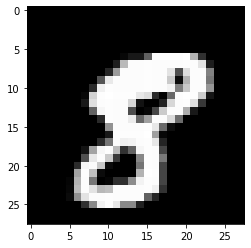

8


In [79]:
import matplotlib.pyplot as plt

idx = 10
img = X[:, idx]
img = np.reshape(img, (28, 28))

plt.imshow(img, cmap='gray')
plt.show()

print(Y[idx])

###### Choose a number of digits (for example, 0, 6 and 9) and extract from X and Y the sub-dataset containing only the considered digits. Re-call X and Y those datasets, since the originals are not required anymore;

In [80]:
target = [0,6,9]
del_idx = []

for i in range(len(Y)):
    if not Y[i] in target:
        del_idx.append(i)

Y = np.delete(Y, del_idx)
X = np.delete(X, del_idx,axis=1)

In [81]:
print(X.shape)
print(Y.shape)
print("\nUnique Values: {}".format(np.unique(Y)))

(784, 12457)
(12457,)

Unique Values: [0 6 9]


#### Set Ntrain < N and randomly sample a training set with Ntrain datapoints from X (and the cor- responding Y ). Call them Xtrain and Ytrain. Everything else is the test set. Call it Xtest and Ytest.

In [82]:
def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Ytrain, Xtest, Ytest

Xtrain, Ytrain, Xtest, Ytest = split_data(X, Y, 9000)

print(Xtrain.shape, Xtest.shape)

(784, 9000) (784, 3457)


#### Implement the algorithms computing the PCA and LDA of Xtrain with a fixed k. Visualize the results (for k = 2) and the position of the centroid of each cluster;

In [83]:
def plot_results(Z, c0, c6, c9, c_all, title, Ytrain=Ytrain):
  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot()
  ax.set_xlabel('Component 1', fontsize=15)
  ax.set_ylabel('Component 2', fontsize=15)
  ax.set_title(title, fontsize=20)
  ax.scatter(Z[0, :], Z[1, :], c=Ytrain)
  ax.plot(c0[0], c0[1], "-ro", markersize=10, markeredgecolor="black", markerfacecolor="red")
  ax.plot(c6[0], c6[1], "-ro", markersize=10, markeredgecolor="black", markerfacecolor="red")
  ax.plot(c9[0], c9[1], "-ro", markersize=10, markeredgecolor="black", markerfacecolor="red")
  ax.plot(c_all[0], c_all[1], "-ro", markersize=10, markeredgecolor="white", markerfacecolor="blue")
  plt.show()

def plot_3d(Z, title, Ytrain=Ytrain):
  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(projection="3d")
  ax.set_xlabel('Component 1', fontsize=15)
  ax.set_ylabel('Component 2', fontsize=15)
  ax.set_zlabel('Component 3', fontsize=15)
  ax.set_title(title, fontsize=20)
  ax.scatter(Z[1, :], Z[2, :], Z[0, :], c=Ytrain)
  plt.show()


##### PCA

In [84]:
k = 2

def PCA(X, k):
    c_X = np.mean(X, axis = 1)

    c_X = np.reshape(c_X, (len(c_X), 1))

    X_c = X - c_X

    U, _, _ = np.linalg.svd(X_c, full_matrices = False)

    U_k = U[:, :k]

    Z_k = U_k.T @ X

    return Z_k, U_k.T

Z_pca2, P_pca2 = PCA(Xtrain, k)

def centroid_chosen_returned(X, Y, digit):
    I = (Y == digit)
    tmp_X = X[:, I]
    tmp_Y = Y[I]
    return np.mean(tmp_X, axis = 1), tmp_X, tmp_Y

centroid0, X0, Y0 = centroid_chosen_returned(Z_pca2, Ytrain, target[0])
centroid6, X6, Y6 = centroid_chosen_returned(Z_pca2, Ytrain, target[1])
centroid9, X9, Y9 = centroid_chosen_returned(Z_pca2, Ytrain, target[2])
centroid_all_samples = np.mean(Z_pca2, axis = 1)

centroids_pca2 = []

centroids_pca2.extend([centroid0, centroid6, centroid9])

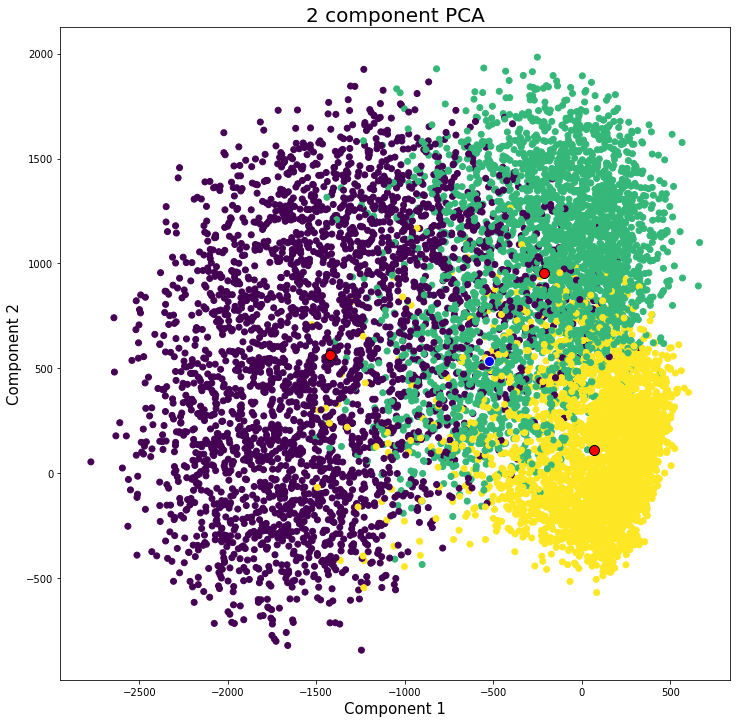

In [85]:
plot_results(Z_pca2, centroid0, centroid6, centroid9, centroid_all_samples, '2 component PCA')

In [86]:
def avg_centroid_dist(Z, c):
    dist = []
    c = np.reshape(c, (len(c), 1))

    for Z_element in zip(Z[0, :], Z[1, :]):
        Z_element = np.array(Z_element)
        Z_element = np.reshape(Z_element, (len(Z_element), 1))
        dist.append(np.linalg.norm((abs(Z_element) - abs(c))))

    return np.mean(dist)

In [87]:
print(f"Average distance from centroid for digit {target[0]} = {avg_centroid_dist(X0, centroid0)}")
print(f"Average distance from centroid for digit {target[1]} = {avg_centroid_dist(X6, centroid6)}")
print(f"Average distance from centroid for digit {target[2]} = {avg_centroid_dist(X9, centroid9)}")

Average distance from centroid for digit 0 = 647.0672618488604
Average distance from centroid for digit 6 = 458.9738352117624
Average distance from centroid for digit 9 = 279.1983129006382


In [88]:
Z_pca2_test, _ = PCA(Xtest, k)

c0_test, X0_test, Y0_test = centroid_chosen_returned(Z_pca2_test, Ytest, target[0])
c6_test, X6_test, Y6_test = centroid_chosen_returned(Z_pca2_test, Ytest, target[1])
c9_test, X9_test, Y9_test = centroid_chosen_returned(Z_pca2_test, Ytest, target[2])

print("Distance from centroid test set: ")
print(f"Average distance from centroid for digit {target[0]} = {avg_centroid_dist(X0_test, c0_test)}")
print(f"Average distance from centroid for digit {target[1]} = {avg_centroid_dist(X6_test, c6_test)}")
print(f"Average distance from centroid for digit {target[2]} = {avg_centroid_dist(X9_test, c9_test)}")

print("Distance from centroid of train set: ")
print(f"Average distance from centroid for digit {target[0]} = {avg_centroid_dist(X0_test, centroid0)}")
print(f"Average distance from centroid for digit {target[1]} = {avg_centroid_dist(X6_test, centroid6)}")
print(f"Average distance from centroid for digit {target[2]} = {avg_centroid_dist(X9_test, centroid9)}")

Distance from centroid test set: 
Average distance from centroid for digit 0 = 626.8740723229096
Average distance from centroid for digit 6 = 490.9129970800576
Average distance from centroid for digit 9 = 311.90974261145817
Distance from centroid of train set: 
Average distance from centroid for digit 0 = 622.3938221771068
Average distance from centroid for digit 6 = 491.21604488045597
Average distance from centroid for digit 9 = 277.18809423200315


##### LDA (Linear Discriminant Analysis)

In [89]:
def LDA(X, Y, k, target = target):
  centroids = []
  Xclusters = []
  Yclusters = []
  centroid_all_samples = np.mean(X, axis = 1)

  for digit in target:
    current_centroid, Xcluster, Ycluster = centroid_chosen_returned(X, Y, digit)
    centroids.append(current_centroid)
    Xclusters.append(Xcluster)
    Yclusters.append(Ycluster)
  
  X0centered = Xclusters[0] - np.reshape(centroids[0], (len(centroids[0]), 1))
  X6centered = Xclusters[1] - np.reshape(centroids[1], (len(centroids[1]), 1))
  X9centered = Xclusters[2] - np.reshape(centroids[2], (len(centroids[2]), 1))

  Xw = np.concatenate((X0centered, X6centered, X9centered), axis=1)  
  
  Sw = Xw @ Xw.T

  Xbar0 = np.repeat(centroids[0].reshape(len(centroids[0]), 1), X0centered.shape[1], axis=1)
  Xbar6 = np.repeat(centroids[1].reshape(len(centroids[1]), 1), X6centered.shape[1], axis=1)
  Xbar9 = np.repeat(centroids[2].reshape(len(centroids[2]), 1), X9centered.shape[1], axis=1)

  Xbar = np.concatenate((Xbar0, Xbar6, Xbar9), axis=1)

  Xbarc = Xbar - centroid_all_samples.reshape((len(centroid_all_samples), 1))

  Sb = Xbarc @ Xbarc.T

  try:
    L = np.linalg.cholesky(Sw)
  except:
    epsilon = 1e-6
    Sw = Sw + epsilon * np.eye(Sw.shape[0])
    L = np.linalg.cholesky(Sw)

  _, W = scipy.sparse.linalg.eigs(np.linalg.inv(L) @ Sb @ L, k=k)
  W = np.real(W)

  Q = np.linalg.inv(L).T @ W

  Z = Q.T @ X

  return Z, Q.T

In [90]:
Z_lda2, P_lda2 = LDA(Xtrain, Ytrain, k)

centroid0, X0, Y0 = centroid_chosen_returned(Z_lda2, Ytrain, target[0])
centroid6, X6, Y6 = centroid_chosen_returned(Z_lda2, Ytrain, target[1])
centroid9, X9, Y9 = centroid_chosen_returned(Z_lda2, Ytrain, target[2])
centroid_all_samples = np.mean(Z_lda2, axis = 1)

centroids_lda2 = []
centroids_lda2.extend([centroid0, centroid6, centroid9])

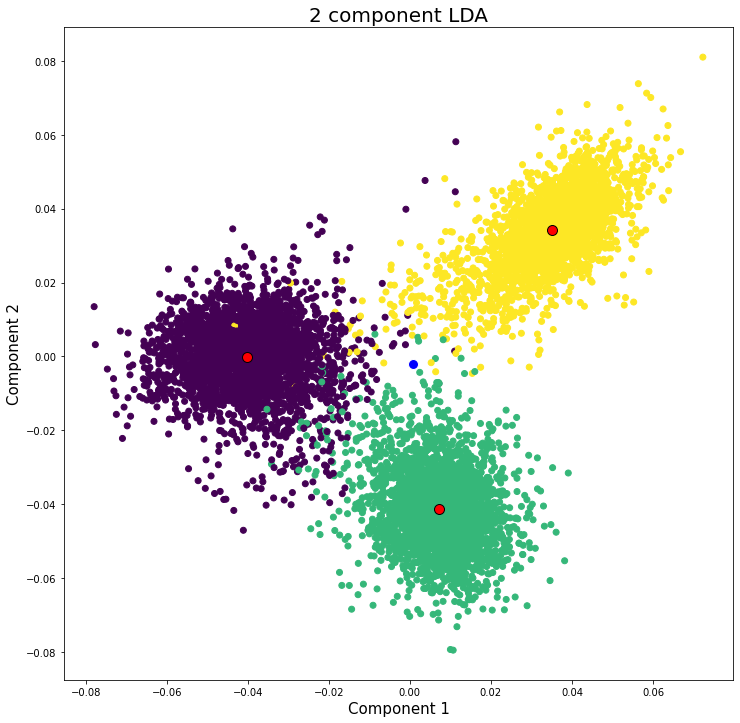

In [91]:
plot_results(Z_lda2, centroid0, centroid6, centroid9, centroid_all_samples, "2 component LDA")

In [92]:
print(f"Average distance from centroid for digit {target[0]} = {avg_centroid_dist(X0, centroid0)}")
print(f"Average distance from centroid for digit {target[1]} = {avg_centroid_dist(X6, centroid6)}")
print(f"Average distance from centroid for digit {target[2]} = {avg_centroid_dist(X9, centroid9)}")

Average distance from centroid for digit 0 = 0.012832059413623802
Average distance from centroid for digit 6 = 0.011095013702832944
Average distance from centroid for digit 9 = 0.01196589848953309


In [93]:
Z_lda2_test, _ = LDA(Xtest, Ytest, k)

c0_test, X0_test, Y0_test = centroid_chosen_returned(Z_lda2_test, Ytest, target[0])
c6_test, X6_test, Y6_test = centroid_chosen_returned(Z_lda2_test, Ytest, target[1])
c9_test, X9_test, Y9_test = centroid_chosen_returned(Z_lda2_test, Ytest, target[2])

print("Distance from centroid test set: ")
print(f"Average distance from centroid for digit {target[0]} = {avg_centroid_dist(X0_test, c0_test)}")
print(f"Average distance from centroid for digit {target[1]} = {avg_centroid_dist(X6_test, c6_test)}")
print(f"Average distance from centroid for digit {target[2]} = {avg_centroid_dist(X9_test, c9_test)}")

print("Distance from centroid train set: ")
print(f"Average distance from centroid for digit {target[0]} = {avg_centroid_dist(X0_test, centroid0)}")
print(f"Average distance from centroid for digit {target[1]} = {avg_centroid_dist(X6_test, centroid6)}")
print(f"Average distance from centroid for digit {target[2]} = {avg_centroid_dist(X9_test, centroid9)}")

Distance from centroid test set: 
Average distance from centroid for digit 0 = 0.020240207763190455
Average distance from centroid for digit 6 = 0.01674854959263495
Average distance from centroid for digit 9 = 0.020837787098134424
Distance from centroid train set: 
Average distance from centroid for digit 0 = 0.03464380661468774
Average distance from centroid for digit 6 = 0.032500897388950505
Average distance from centroid for digit 9 = 0.05160367790593471


In [94]:
def classification_alg(centroids, P, input, target):
  z_input = P @ input
  distances = [np.linalg.norm((z_input - centroid)) for centroid in centroids]
  cluster = np.argmin(distances)
  return target[cluster]

def accuracy_score(labels, true_labels):
  acc = (labels / true_labels) * 100
  return acc

In [95]:
def dataset_classification(Xtest, Ytest, P, centroids, target = target):
  correct_prediction = 0
  for index, input in enumerate(Xtest.T):
    true_label = Ytest[index]
    if classification_alg(centroids, P, input, target) == true_label:
      correct_prediction += 1

  acc = accuracy_score(correct_prediction, len(Xtest.T))
  print(f"The accuracy score is: {acc}")
  
  

In [96]:
print("For PCA and k=2 the accuracy obtained is: ")
dataset_classification(Xtest, Ytest, P_pca2, centroids_pca2)

For PCA and k=2 the accuracy obtained is: 
The accuracy score is: 84.58200752097194


In [97]:
print("For LDA and k=2 the accuracy obtained is: ")
dataset_classification(Xtest, Ytest, P_lda2, centroids_lda2)

For LDA and k=2 the accuracy obtained is: 
The accuracy score is: 98.17761064506799


In [98]:
# visualize result for k = 3
k = 3
Z_pca3, P_pca3 = PCA(Xtrain, k)
Z_lda3, P_lda3 = LDA(Xtrain, Ytrain, k)

centroid0, X0, Y0 = centroid_chosen_returned(Z_pca3, Ytrain, target[0])
centroid6, X6, Y6 = centroid_chosen_returned(Z_pca3, Ytrain, target[1])
centroid9, X9, Y9 = centroid_chosen_returned(Z_pca3, Ytrain, target[2])

centroids_pca3 = []
centroids_pca3.extend([centroid0, centroid6, centroid9])


centroid0, X0, Y0 = centroid_chosen_returned(Z_lda3, Ytrain, target[0])
centroid6, X6, Y6 = centroid_chosen_returned(Z_lda3, Ytrain, target[1])
centroid9, X9, Y9 = centroid_chosen_returned(Z_lda3, Ytrain, target[2])

centroids_lda3 = []
centroids_lda3.extend([centroid0, centroid6, centroid9])

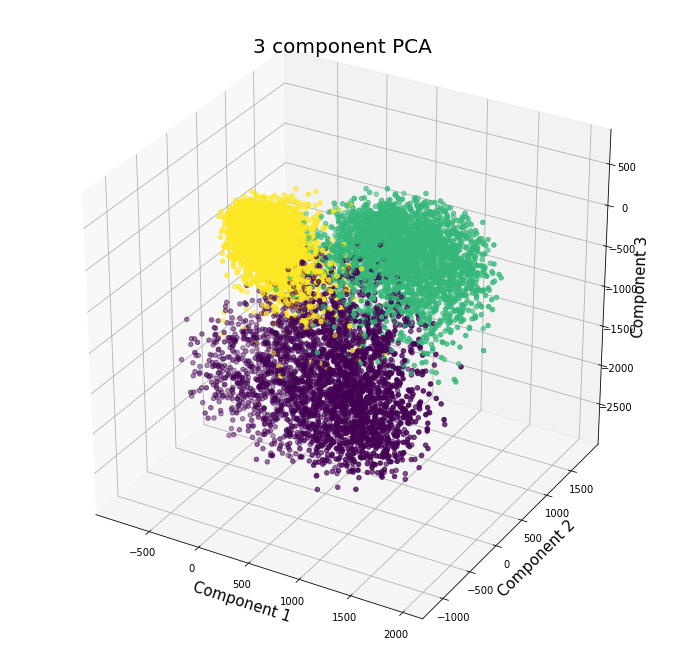

In [99]:
plot_3d(Z_pca3, "3 component PCA")

In [100]:
print("For PCA and k=3 the accuracy obtained is: ")
dataset_classification(Xtest, Ytest, P_pca3, centroids_pca3)

For PCA and k=3 the accuracy obtained is: 
The accuracy score is: 93.17327162279433


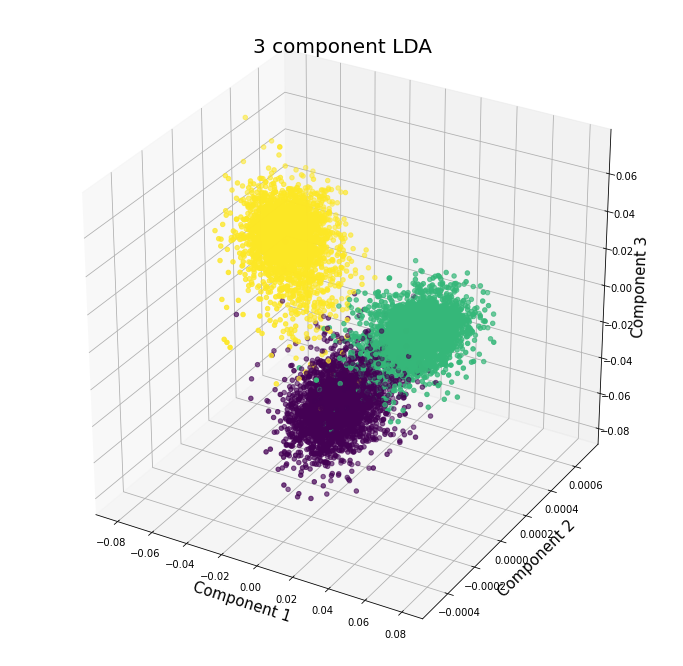

In [101]:
plot_3d(Z_lda3, "3 component LDA")

In [102]:
print("For LDA and k=3 the accuracy obtained is: ")
dataset_classification(Xtest, Ytest, P_lda3, centroids_lda3)

For LDA and k=3 the accuracy obtained is: 
The accuracy score is: 98.09083019959502


In [103]:
# visualize results for different k 
ks = [10,15,50,400]
for k in ks:
  Z_pca, P_pca = PCA(Xtrain, k)
  Z_lda, P_lda = LDA(Xtrain, Ytrain, k)

  centroid0, X0, Y0 = centroid_chosen_returned(Z_pca, Ytrain, target[0])
  centroid6, X6, Y6 = centroid_chosen_returned(Z_pca, Ytrain, target[1])
  centroid9, X9, Y9 = centroid_chosen_returned(Z_pca, Ytrain, target[2])

  centroids_pca = []
  centroids_pca.extend([centroid0, centroid6, centroid9])


  centroid0, X0, Y0 = centroid_chosen_returned(Z_lda, Ytrain, target[0])
  centroid6, X6, Y6 = centroid_chosen_returned(Z_lda, Ytrain, target[1])
  centroid9, X9, Y9 = centroid_chosen_returned(Z_lda, Ytrain, target[2])

  centroids_lda = []
  centroids_lda.extend([centroid0, centroid6, centroid9])

  print(f"For PCA and k={k} the accuracy obtained is: ")
  dataset_classification(Xtest, Ytest, P_pca, centroids_pca)

  print(f"For LDA and k={k} the accuracy obtained is: ")
  dataset_classification(Xtest, Ytest, P_lda, centroids_lda)

  print("\n")

For PCA and k=10 the accuracy obtained is: 
The accuracy score is: 95.74775817182528
For LDA and k=10 the accuracy obtained is: 
The accuracy score is: 98.03297656927971


For PCA and k=15 the accuracy obtained is: 
The accuracy score is: 95.95024587792884
For LDA and k=15 the accuracy obtained is: 
The accuracy score is: 98.11975701475268


For PCA and k=50 the accuracy obtained is: 
The accuracy score is: 96.00809950824414
For LDA and k=50 the accuracy obtained is: 
The accuracy score is: 98.11975701475268


For PCA and k=400 the accuracy obtained is: 
The accuracy score is: 96.0370263234018
For LDA and k=400 the accuracy obtained is: 
The accuracy score is: 97.97512293896442




### Visualizing dyad

dimensions: (512, 512) 



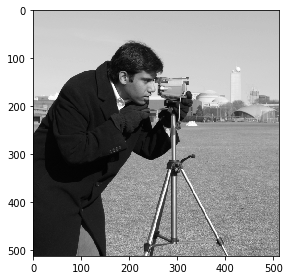

In [104]:
from skimage import data, io

X = data.camera()
io.imshow(X)

print(f"dimensions: {X.shape} \n")

In [105]:
U, s, VT = np.linalg.svd(X, full_matrices=False)

print(f"dimensions: {U.shape}, {s.shape}, {VT.shape} \n")

dimensions: (512, 512), (512,), (512, 512) 



In [106]:
print(U * s @ VT)

[[200. 200. 200. ... 189. 190. 190.]
 [200. 199. 199. ... 190. 190. 190.]
 [199. 199. 199. ... 190. 190. 190.]
 ...
 [ 25.  25.  27. ... 139. 122. 147.]
 [ 25.  25.  26. ... 158. 141. 168.]
 [ 25.  25.  27. ... 151. 152. 149.]]


In [107]:
# plot some dyads
n = X.shape[0]
dyad = []
for i in range(n):
  dyad_ith = s[i] * np.outer(U[:,i], VT[i])
  dyad.append(dyad_ith)

print("\nSome dyad: \n")
for i in np.arange(0, 500, 100):
  print(f"index={i}, value = {dyad[i]} \n")


Some dyad: 

index=0, value = [[167.20045954 166.6115525  166.49077317 ... 227.26986471 227.58326146
  226.48628752]
 [167.33916028 166.74976472 166.62888519 ... 227.45839589 227.77205262
  226.67416869]
 [167.48891131 166.8989883  166.7780006  ... 227.66194734 227.97588476
  226.87701833]
 ...
 [109.67347227 109.28718458 109.20796058 ... 149.07539892 149.28096839
  148.56141929]
 [111.3683749  110.97611748 110.89566915 ... 151.37922208 151.58796844
  150.85729936]
 [110.33360785 109.94499505 109.8652942  ... 149.97269863 150.17950544
  149.4556253 ]] 

index=100, value = [[ 4.54088123e-02  6.09373561e-02  5.56514829e-02 ... -2.97581732e-02
  -8.79556019e-03  2.11413909e-02]
 [ 1.15276875e-02  1.54698342e-02  1.41279384e-02 ... -7.55454509e-03
  -2.23288088e-03  5.36704959e-03]
 [-7.80721717e-03 -1.04770671e-02 -9.56825761e-03 ...  5.11637520e-03
   1.51223617e-03 -3.63487663e-03]
 ...
 [ 4.06088061e-01  5.44958821e-01  4.97687600e-01 ... -2.66125411e-01
  -7.86581239e-02  1.89066087e

In [108]:
initial_matrix = np.zeros((n,n))
for i in range(n):
  initial_matrix = initial_matrix + dyad[i]

In [109]:
print(f"{X} \n\n")
print(initial_matrix)

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]] 


[[200. 200. 200. ... 189. 190. 190.]
 [200. 199. 199. ... 190. 190. 190.]
 [199. 199. 199. ... 190. 190. 190.]
 ...
 [ 25.  25.  27. ... 139. 122. 147.]
 [ 25.  25.  26. ... 158. 141. 168.]
 [ 25.  25.  27. ... 151. 152. 149.]]


In [110]:
print(f"The rank of the total sum is: {np.linalg.matrix_rank(initial_matrix)}")

The rank of the total sum is: 512


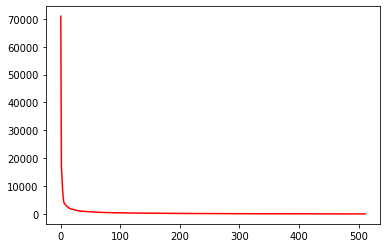


Some singular values: 

index=0, value = 70966.03483871755
index=50, value = 746.0164192850154
index=100, value = 378.06957617770576
index=150, value = 253.40370539144865
index=200, value = 174.32826490442443
index=250, value = 118.35350299347768
index=300, value = 76.63804643947792
index=350, value = 46.92373071338503
index=400, value = 23.449721501032837
index=450, value = 7.218304680175521
index=500, value = 1.0604321276860038


In [111]:
plt.plot(s, color="red")
plt.show()

print("\nSome singular values: \n")
for i in np.arange(0, 550, 50):
  print(f"index={i}, value = {s[i]}")

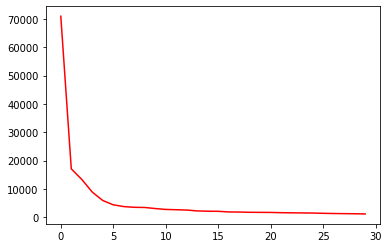

In [112]:
plt.plot(s[:30], color="red")
plt.show()

In [113]:
def plot_krank(D1, D2, D3, D4, ks):

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22, 5))

  fig.suptitle('Dyad plot', fontsize=20)

  ax1.set_title(f'k = {ks[0]}')
  im1 = ax1.imshow(D1, cmap='gray')

  ax2.set_title(f'k = {ks[1]}')
  im2 = ax2.imshow(D2, cmap='gray')

  ax3.set_title(f'k = {ks[2]}')
  im3 = ax3.imshow(D3, cmap='gray')

  ax4.set_title(f'k = {ks[3]}')
  im4 = ax4.imshow(D4, cmap='gray')

  plt.tight_layout()

  plt.subplots_adjust(top=0.85)
  plt.show()

In [114]:
# visualizing different k dyad
ks = [0, 10, 200, 450]
D1 = dyad[ks[0]]
D2 = dyad[ks[1]]
D3 = dyad[ks[2]]
D4 = dyad[ks[3]]

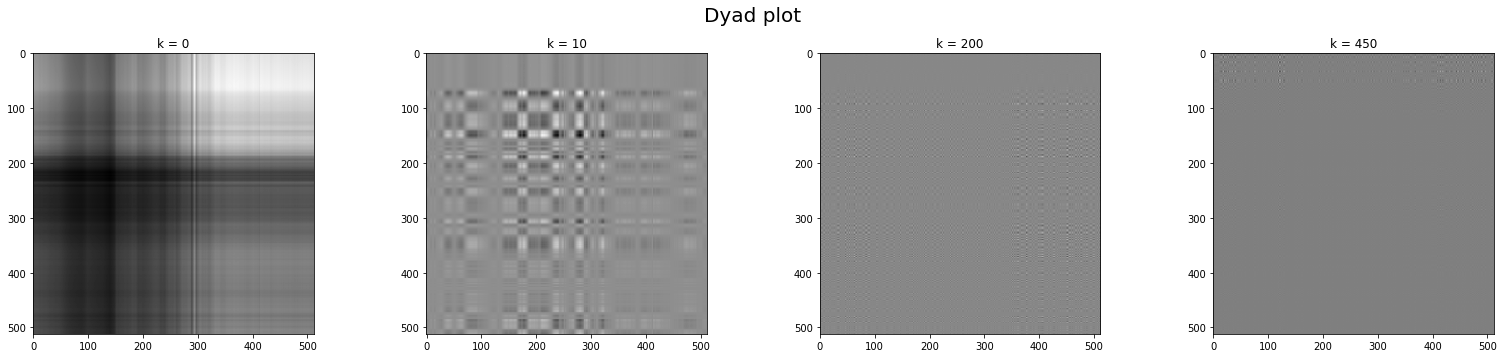

In [115]:
plot_krank(D1, D2, D3, D4, ks)

In [116]:
def compute_krank(k):
  reconstructed = 0
  for i in range(k):
    reconstructed = reconstructed + dyad[i]
  return reconstructed

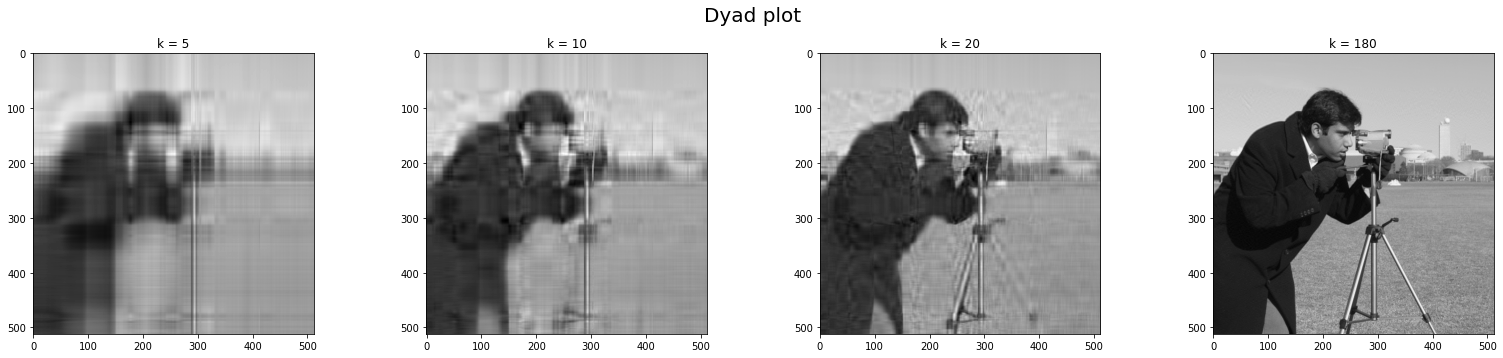

In [117]:
k = [5,10,20,180]
k_rank_computed = []

for i in range(4):
  k_rank_computed.append(compute_krank(k[i]))
  
plot_krank(k_rank_computed[0], k_rank_computed[1], k_rank_computed[2], k_rank_computed[3], k)

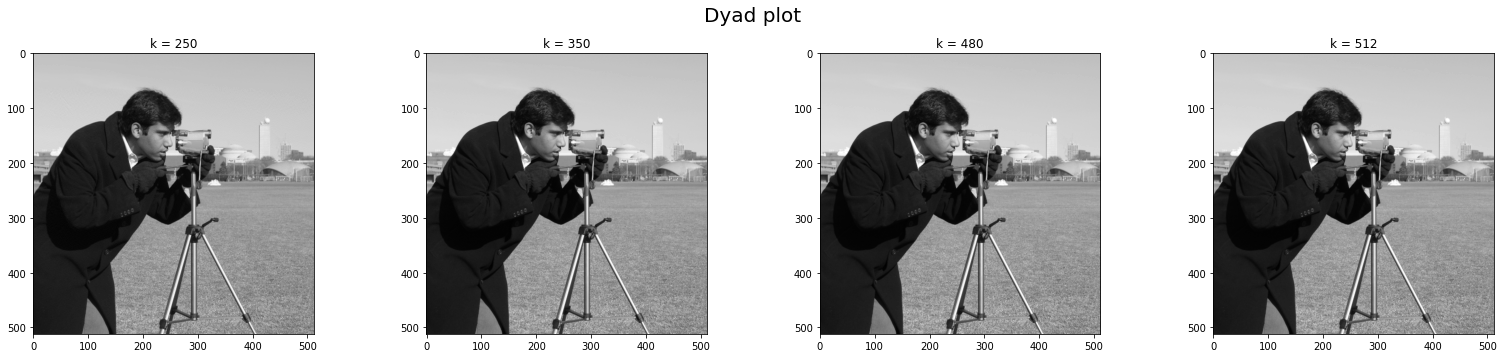

In [118]:
k = [250,350,480,512]
k_rank_computed = []

for i in range(4):
  k_rank_computed.append(compute_krank(k[i]))
  
plot_krank(k_rank_computed[0], k_rank_computed[1], k_rank_computed[2], k_rank_computed[3], k)

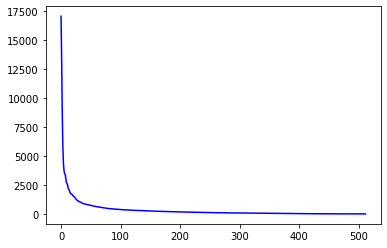

In [119]:
aprx_error = []
sums = [None] * X.shape[0]

for i in range(X.shape[0]):
  if (i != 0):
    sums[i] = sums[i-1] + dyad[i]
  else:
    sums[i] = dyad[i]

for i in range(X.shape[0]):
  err = np.linalg.norm(X - sums[i], 2)
  aprx_error.append(err)

plt.plot(aprx_error, color="blue")
plt.show()

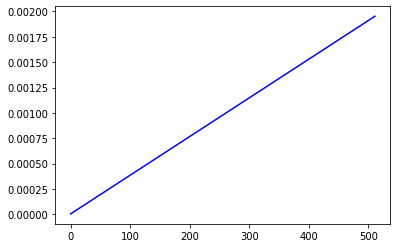

In [120]:
m, n = X.shape
compression_factors = []

for i in range(1, X.shape[0] + 1):
  factor_k = i / (m * n)
  compression_factors.append(factor_k)

plt.plot(compression_factors, color="blue")
plt.show()